## Develop a program to implement k-Nearest Neighbour algorithm to classify the randomly generated 100 values of x in the range of [0,1]. Perform the following based on dataset generated.
    --> Label the first 50 points (x,...-,Nso) as follows: if (x is 0.5), then x ∊ Class1, else x ∊ Class2
    --> Classify the remaining points, xs,....,Xzas using KNN. Perform this for k=1,2,3,4,5,20,30

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [15]:
np.random.seed(42)
X = np.random.rand(100)
X = X.reshape(-1,1)

In [16]:
X.shape

(100, 1)

In [17]:
# Generating the target values.
y = np.array([1 if x<.5 else 2 for x in X[:50]])
y

array([1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 2, 1])

In [18]:
# Prepating the data (Creating train and test split)
X_train = X[:50]
y_train = y[:50]
X_test = X[50:]


In [19]:
# Given k values [1,2,3,4,5,20,30]
k_values = [1,2,3,4,5,20,30]
pred_list =[]

for i in k_values:

    # Instanciate KNN
    knn = KNeighborsClassifier(n_neighbors=i)

    # Fitting the model with the training values
    knn.fit(X_train, y_train)

    # Predicting the y_test based on the training
    y_pred = knn.predict(X_test)
    pred_list.append([y_pred])



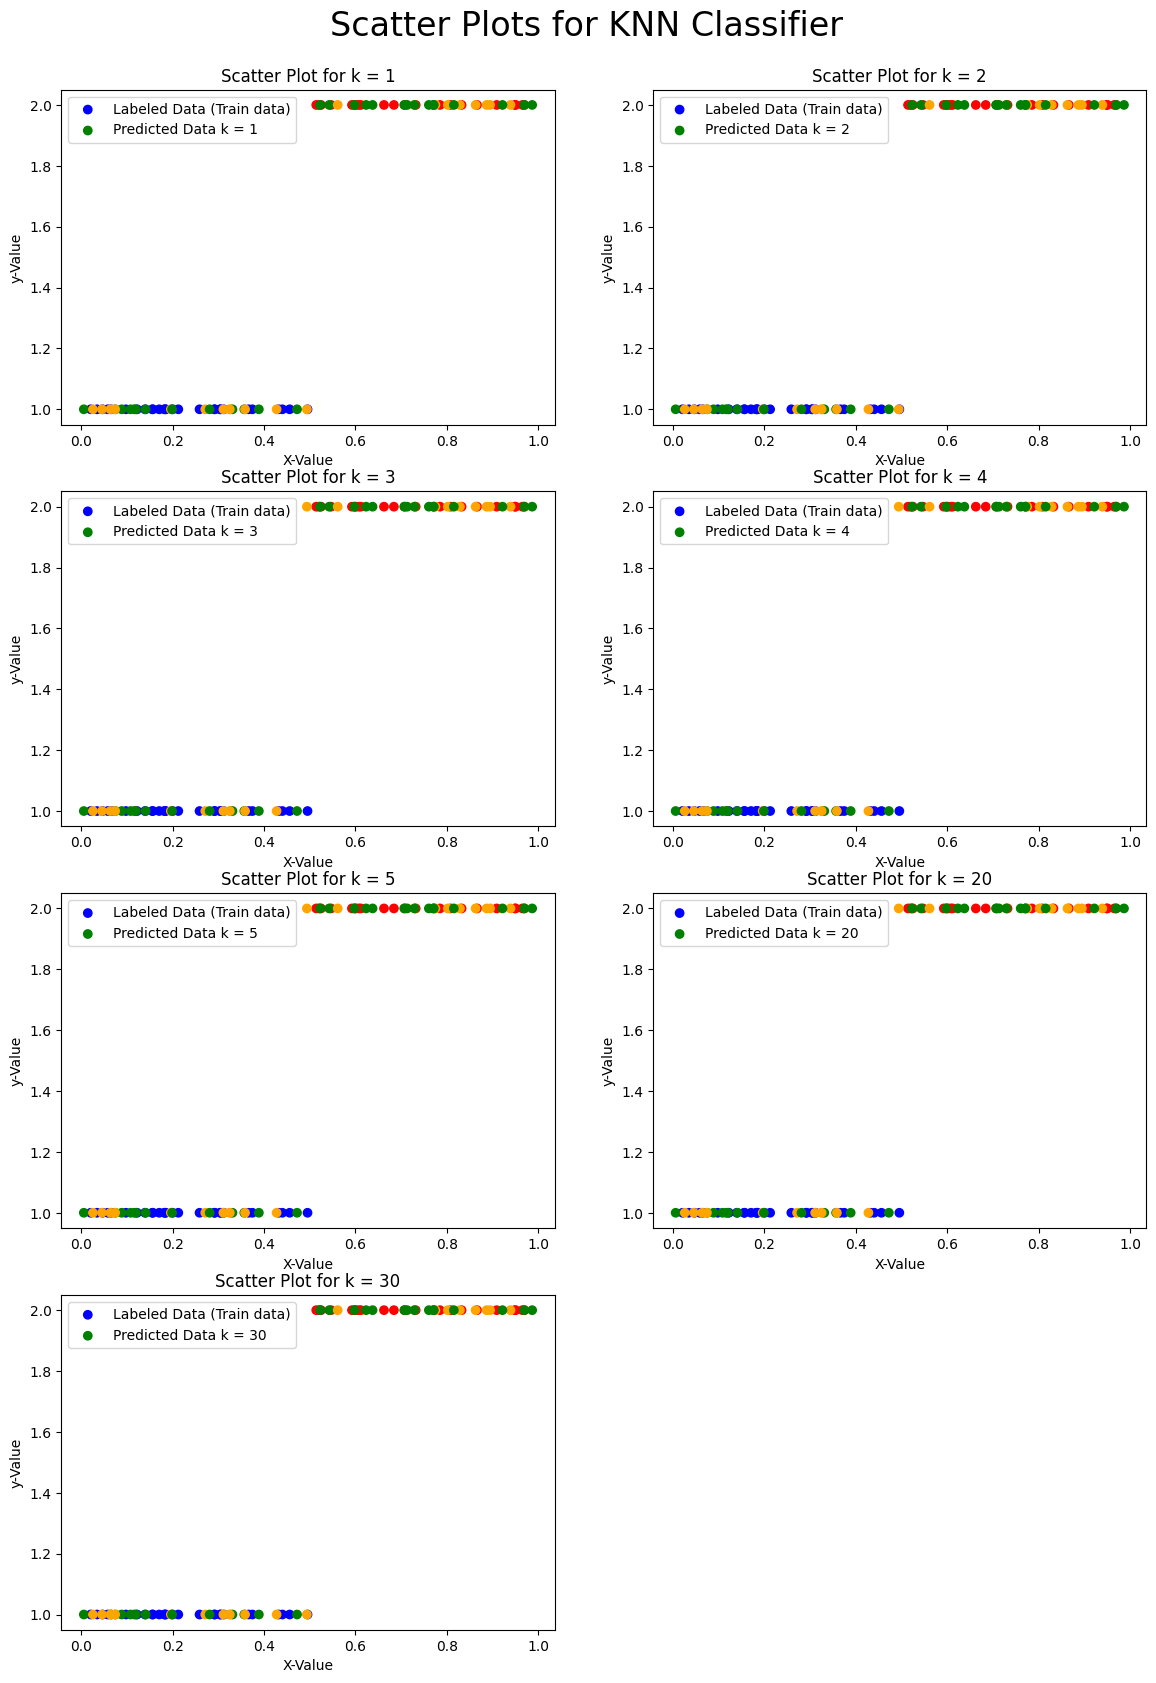

In [22]:
fig, ax = plt.subplots(figsize=(14, 20), nrows=((len(pred_list)+1)//2), ncols=2)
ax = ax.flatten()

for i, k in enumerate(k_values):
    # plotting the train data 
    ax[i].scatter(X_train, y_train, c=["blue" if x <= 0.5 else "red" for x in X_train], label="Labeled Data (Train data)")
    ax[i].scatter(X_test, pred_list[i], c=["green" if x <= 0.5 else "orange" for x in X_train],label=f"Predicted Data k = {k}")
    ax[i].legend()

    ax[i].set_title(f'Scatter Plot for k = {k}')
    ax[i].set_xlabel("X-Value")
    ax[i].set_ylabel("y-Value")
    
for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])

plt.suptitle("Scatter Plots for KNN Classifier", fontsize=24, y=.92)
plt.show();